# 2. 카메라 스티커앱 만들기 첫걸음 [프로젝트]
### -  딥러닝 톺아보기_RS9

##  package import

In [221]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

- 주요 라이브러리 버전 확인

In [222]:
print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


## - 이미지 준비

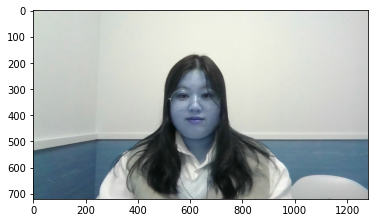

In [223]:
my_image_path = '/aiffel/sumin.jpg' # 이미지 경로 가져오기
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려줌 (실제 출력 X)
plt.show() # 이미지를 출력. (실제 출력 O)

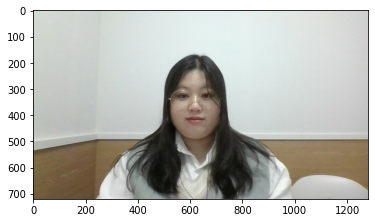

In [224]:
# plt.imshow 이전에 RGB 이미지로 바꿔야 함
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img_rgb) # 이미지 출력을 위한 업로드
plt.show() #이미지 출력

## - 이미지 탐지

In [225]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [226]:
# detector_hog를 이용해서 얼굴 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(531, 284) (716, 469)]]


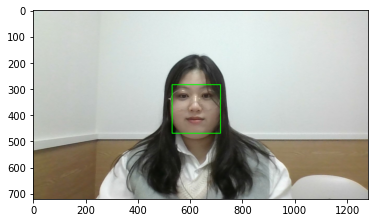

In [227]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## - 얼굴 랜드마크

In [228]:
model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat' # 랜드마크 모델 경로 저장
landmark_predictor = dlib.shape_predictor(model_path) # 랜드마크 경로 불러오기 

In [229]:
list_landmarks = [] # 랜드마크 저장 list 생성


# 얼굴 영역 박스 마다 face landmark를 찾음
# face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
        
print(len(list_landmarks[0]))

68


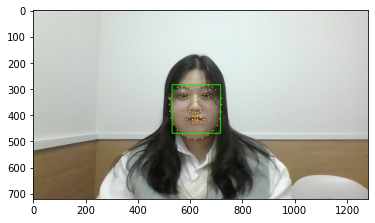

In [230]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## - 스티커 적용하기

In [231]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(620, 369)
(x,y) : (620,276)
(w,h) : (186,186)


In [232]:
sticker_path = os.getenv('HOME')+'/cat_whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(186, 186, 3)


In [233]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h // 16 # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (527,265)


In [234]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (527,265)


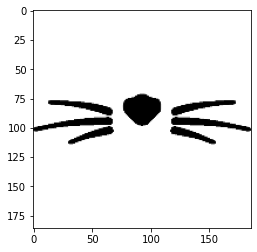

In [235]:
plt.imshow(img_sticker)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [236]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


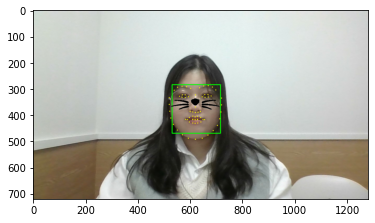

In [237]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

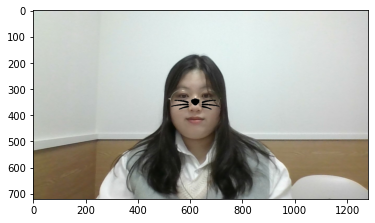

In [238]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[0]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

# 추가실험 및 에러 모음 ----------------------------------------------------------------------

## - 스티커 업로드 관련 에러 

In [24]:
sticker_path = os.getenv('HOME')+'/aiffel/glasses.png' # 안경 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 
print (img_sticker.shape) # 사이즈를 조정한 안경 이미지의 차원 확인

error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


### -경로 재확인 디버깅 : 잘 업로드 됨을 확인

- case 1

In [ ]:
sticker_path = os.getenv('HOME')+'/cat_whiskers.png' # 안경 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 
print (img_sticker.shape) # 사이즈를 조정한 안경 이미지의 차원 확인

- case 2

In [26]:
img = cv2.imread('/aiffel/glasses.png')
if img is None:
    print("Image not loaded. Check the file path.")


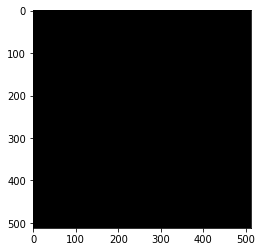

In [59]:
# 스티커 이미지 load
img_sticker = cv2.imread('/aiffel/glasses.png')

plt.imshow(img_sticker)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

Resized sticker image shape: (186, 186, 3)


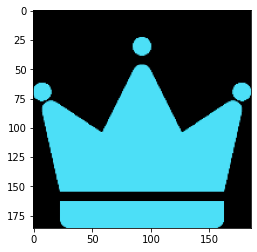

In [82]:
# 스티커 이미지 load
img_sticker = cv2.imread('aiffel/camera_sticker/images/king.png')

# 제대로 load 된 것인지 확인 코드
if img_sticker is None:
    print(f"Failed to load image at {sticker_path}. Check the file path.")
else:
    # 계산된 이미지 차원 (w, h)
    w, h = 186, 186  # (186, 186, 3)

    # Resize 스티커 이미지
    img_sticker = cv2.resize(img_sticker, (w, h))

    # Resize 된 스티커 이미지 크기
    print(f"Resized sticker image shape: {img_sticker.shape}")

plt.imshow(img_sticker)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

Resized sticker image shape: (186, 186, 3)


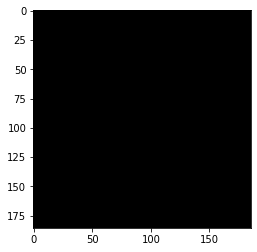

In [83]:
# 스티커 이미지 load
img_sticker = cv2.imread('/aiffel/glasses.png')

# 제대로 load 된 것인지 확인 코드
if img_sticker is None:
    print(f"Failed to load image at {sticker_path}. Check the file path.")
else:
    # 계산된 이미지 차원 (w, h)
    w, h = 186, 186  # (186, 186, 3)

    # Resize 스티커 이미지
    img_sticker = cv2.resize(img_sticker, (w, h))

    # Resize 된 스티커 이미지 크기
    print(f"Resized sticker image shape: {img_sticker.shape}")

plt.imshow(img_sticker)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [84]:
refined_x = x - w # 위치할 x 좌표의 값
refined_y = y - h # 위치할 y 좌표의 값

In [85]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (434,90)


In [86]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

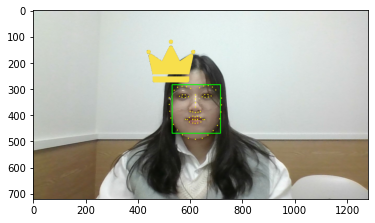

In [87]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

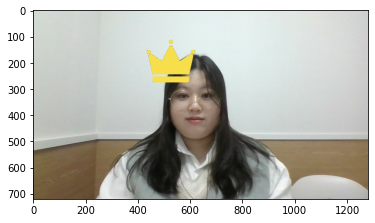

In [88]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## - 스티커 선정 문제 : 검은색 스티커를 선정하여 스티어 이미지 업로드 불가

- 위의 경우 이전에 테스트용 업로드한 왕관만 띄워져 있는 상태임.
- 아래 안경 이미지를 업로드한 상태 
- opencv 상에서 이미지인지 검은색 배경인지 구분이 불가능한 상태인 것으로 확인
- open cv 상에서 투명 처리를 해주거나 구분 가능한 이미지로 바꿔야 함.

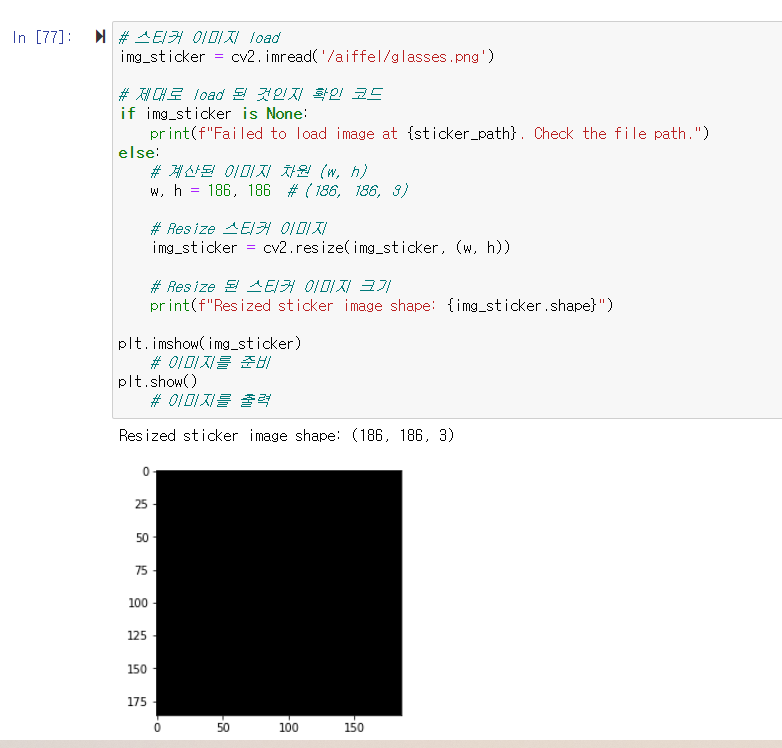

- 스티커 이미지를 교체하는 방식으로 에러 해결

Resized sticker image shape: (186, 186, 3)


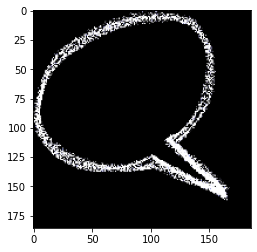

In [118]:
# 스티커 이미지 load
img_sticker = cv2.imread('/aiffel/b_quto.png')

# 제대로 load 된 것인지 확인 코드
if img_sticker is None:
    print(f"Failed to load image at {sticker_path}. Check the file path.")
else:
    # 계산된 이미지 차원 (w, h)
    w, h = 186, 186  # (186, 186, 3)

    # Resize 스티커 이미지
    img_sticker = cv2.resize(img_sticker, (w, h))

    # Resize 된 스티커 이미지 크기
    print(f"Resized sticker image shape: {img_sticker.shape}")

plt.imshow(img_sticker)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [119]:
refined_x = x - w # 위치할 x 좌표의 값
refined_y = y - h # 위치할 y 좌표의 값

In [120]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (434,90)


In [121]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

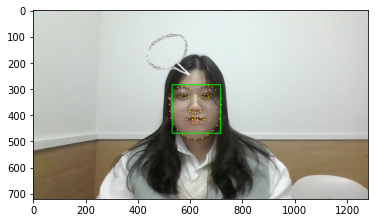

In [122]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

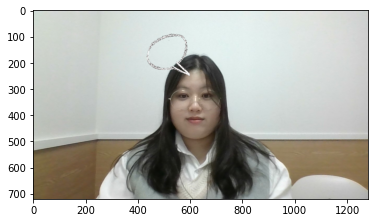

In [123]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## - 스티커 이미지 반전 문제


In [206]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 68개 랜드마크 값으로 forans 
    print (landmark[30]) # 코의 index
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 세로 차지 픽셀수 (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 가로 차지 픽셀 수 (531-345+1) → max(x) - min(x) +1 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(620, 369)
(x,y) : (620,276)
(w,h) : (186,186)


In [207]:
sticker_path = os.getenv('HOME')+'/cat_whiskers.png' # 안경 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옴 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 
print (img_sticker.shape) # 사이즈를 조정한 안경 이미지의 차원 확인

(186, 186, 3)


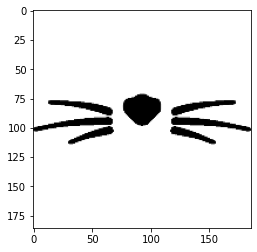

In [208]:
plt.imshow(img_sticker)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [209]:
refined_x = x - w // 2
refined_y = y - h // 12
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (527,261)


In [210]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (527,261)


In [211]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

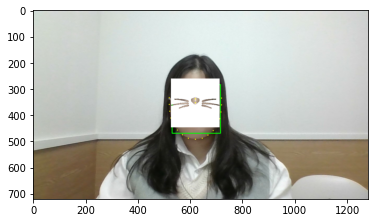

In [212]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

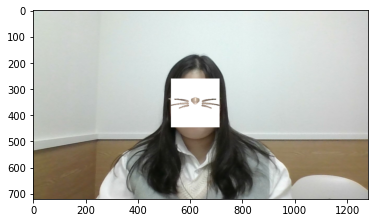

In [213]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

- 예제와 반대로 검은색(GRAY SCALE = 0)이 아닌 흰색(GRAY SCALE = 255)를 잘라내야 함
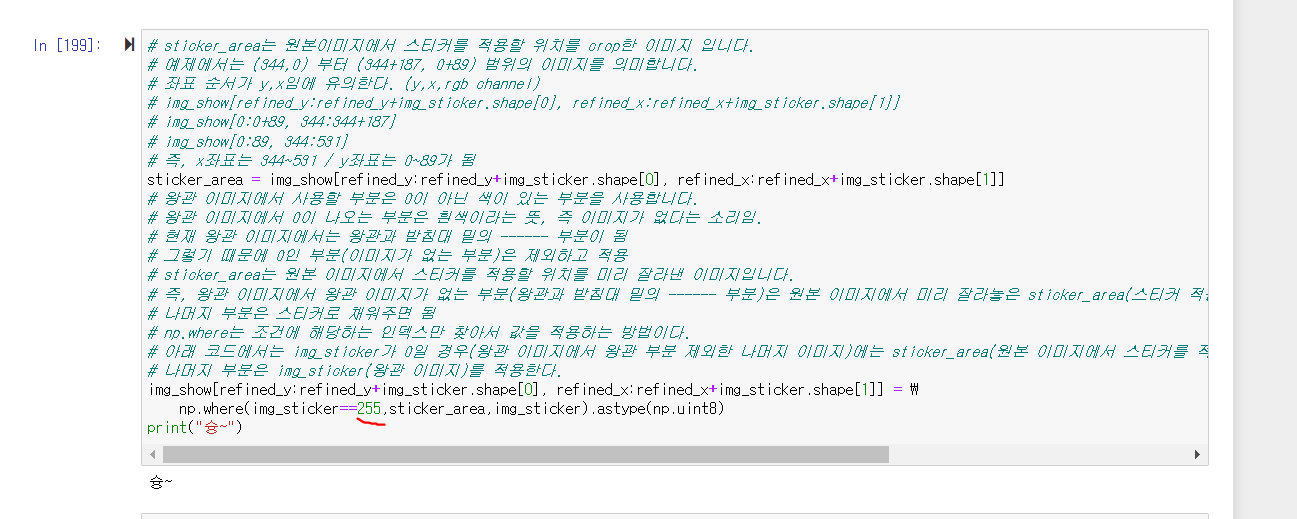

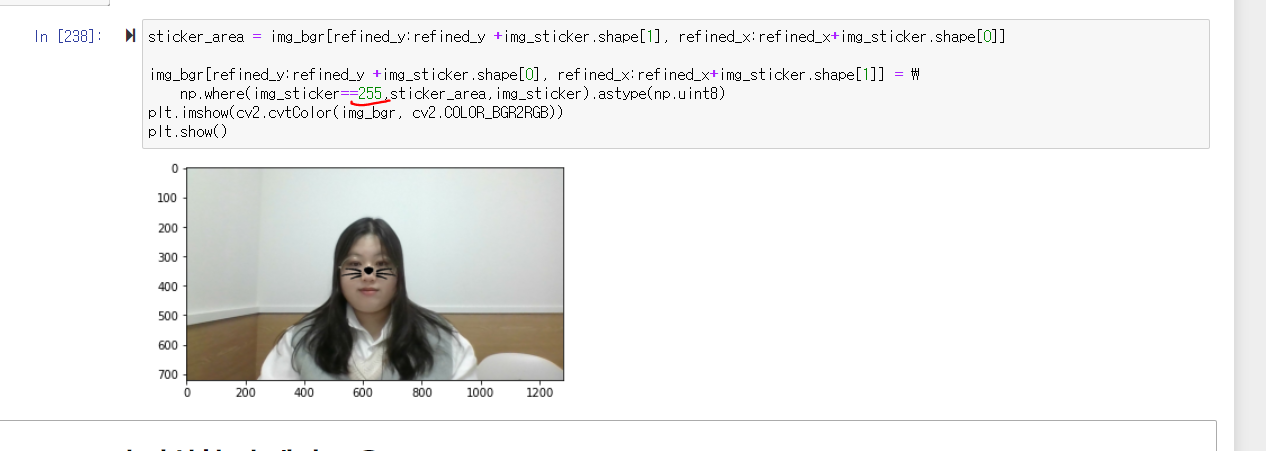